Introduction
--------------



In [115]:
#To open the file and give some of the attributes of the dicom file that we will be referring to

%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom

RefDs = dicom.read_file('im023.dcm')
from datetime import datetime

print('The image is '+str(RefDs.Rows)+'x'+str(RefDs.Columns)+' pixels')
print('The image was encoded with '+str(RefDs.BitsStored)+' bits ')

print('The medical image modality is '+str(RefDs.Modality))

print('The anatomy imaged is '+str(RefDs.BodyPartExamined)) #Righ thigh. Dicom file reads 'EXTREMITY'  in the dicom viewer
if RefDs.PatientsSex=='F':
    print('The patient imaged is Female')
else:
    print('The patient imaged is Male')

print('The patient\'s name is unkown')




The image is 512x512 pixels
The image was encoded with 9 bits 
The medical image modality is MR
The anatomy imaged is EXTREMITY
The patient imaged is Female
The patient's name is unkown


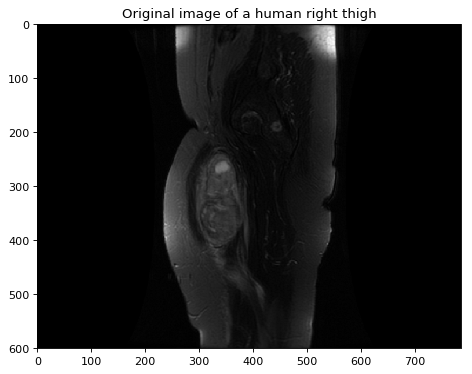

In [127]:
#To open the original image

fig=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
mrithigh = novice.open('im023.png')
plt.title('Original image of a human right thigh')
mrithigh.show()


Original (9-bit encoding) the range is: 255


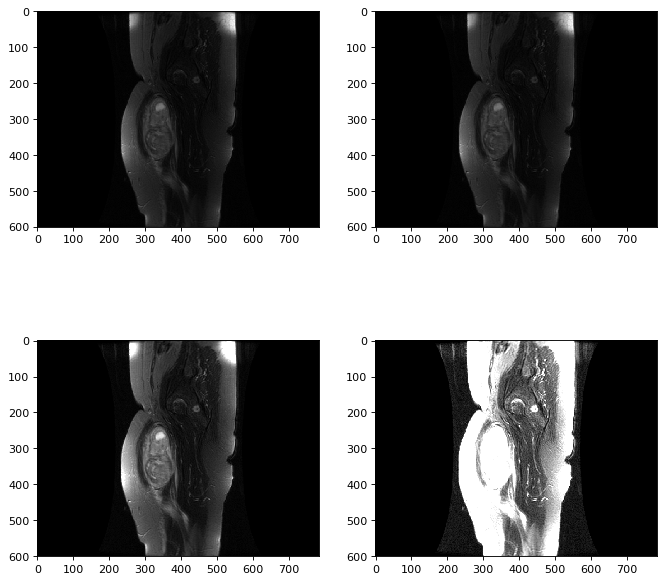

In [119]:
#Applying exposure resclae i.e adjusting the level of exposure or lighting level
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
mrithigharray = mpimg.imread('im023.png','True') 
print('Original (9-bit encoding) the range is: '+str(np.max(mrithigharray))) 
bp=plt.subplot(221)
plt.imshow(mrithigharray)

Jm=exposure.rescale_intensity(mrithigharray,in_range=(0, pow(2,8)-1))
Km=exposure.rescale_intensity(mrithigharray,in_range=(0, pow(2,7)-1))
Lm=exposure.rescale_intensity(mrithigharray,in_range=(0, pow(2,5)-1)) 
plt.subplot(222)
plt.imshow(Jm)
plt.subplot(223)
plt.imshow(Km)
plt.subplot(224)
plt.imshow(Lm)


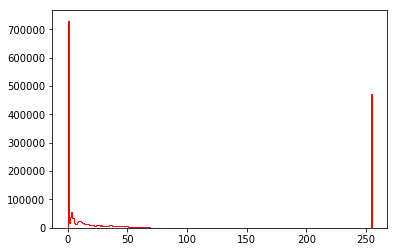

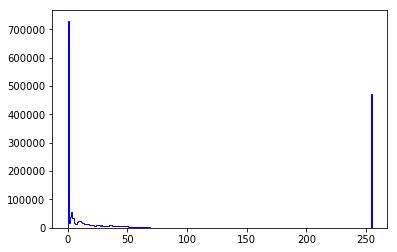

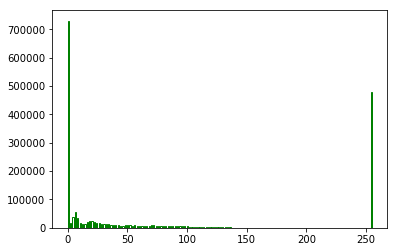

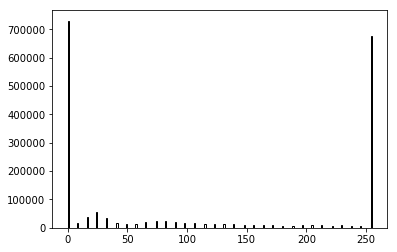

In [120]:

plt.figure()
ht=plt.hist(mrithigharray.ravel(), bins=256, histtype='step', color='red')
plt.figure()
ht=plt.hist(Jm.ravel(), bins=256, histtype='step', color='blue')
plt.figure()
ht=plt.hist(Km.ravel(), bins=256, histtype='step', color='green')
plt.figure()
ht=plt.hist(Lm.ravel(), bins=256, histtype='step', color='black')

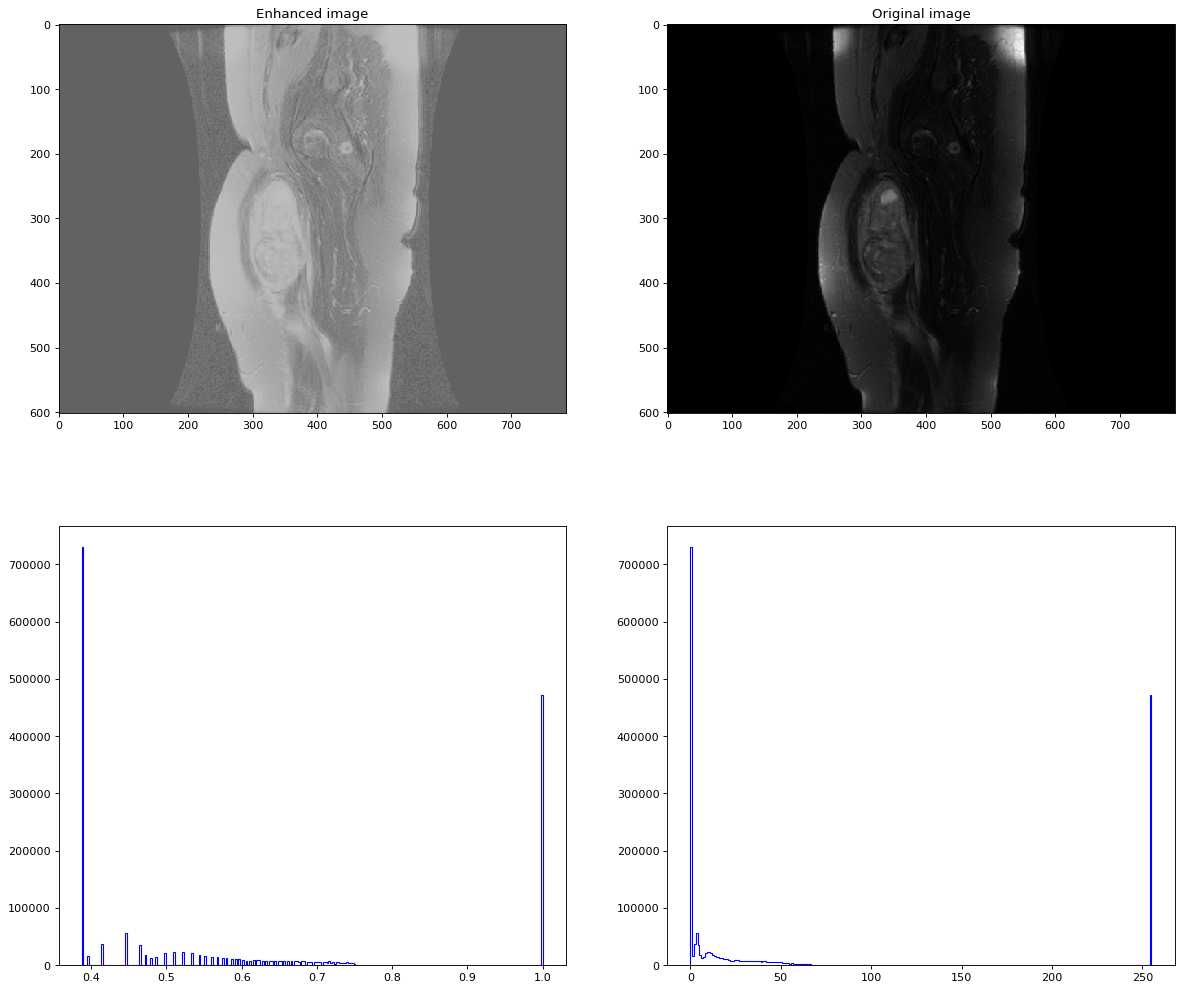

In [145]:
#applying histogram equalization
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
img_eq = exposure.equalize_hist(mrithigharray)

plt.subplot(221)
plt.imshow(img_eq)
plt.title('Enhanced image')
plt.subplot(222)
plt.imshow(mrithigharray)
plt.title('Original image')
plt.subplot(223)
ht=plt.hist(img_eq.ravel(), bins=256, histtype='step', color='blue')
plt.subplot(224)
ht=plt.hist(mrithigharray.ravel(), bins=256, histtype='step', color='blue')

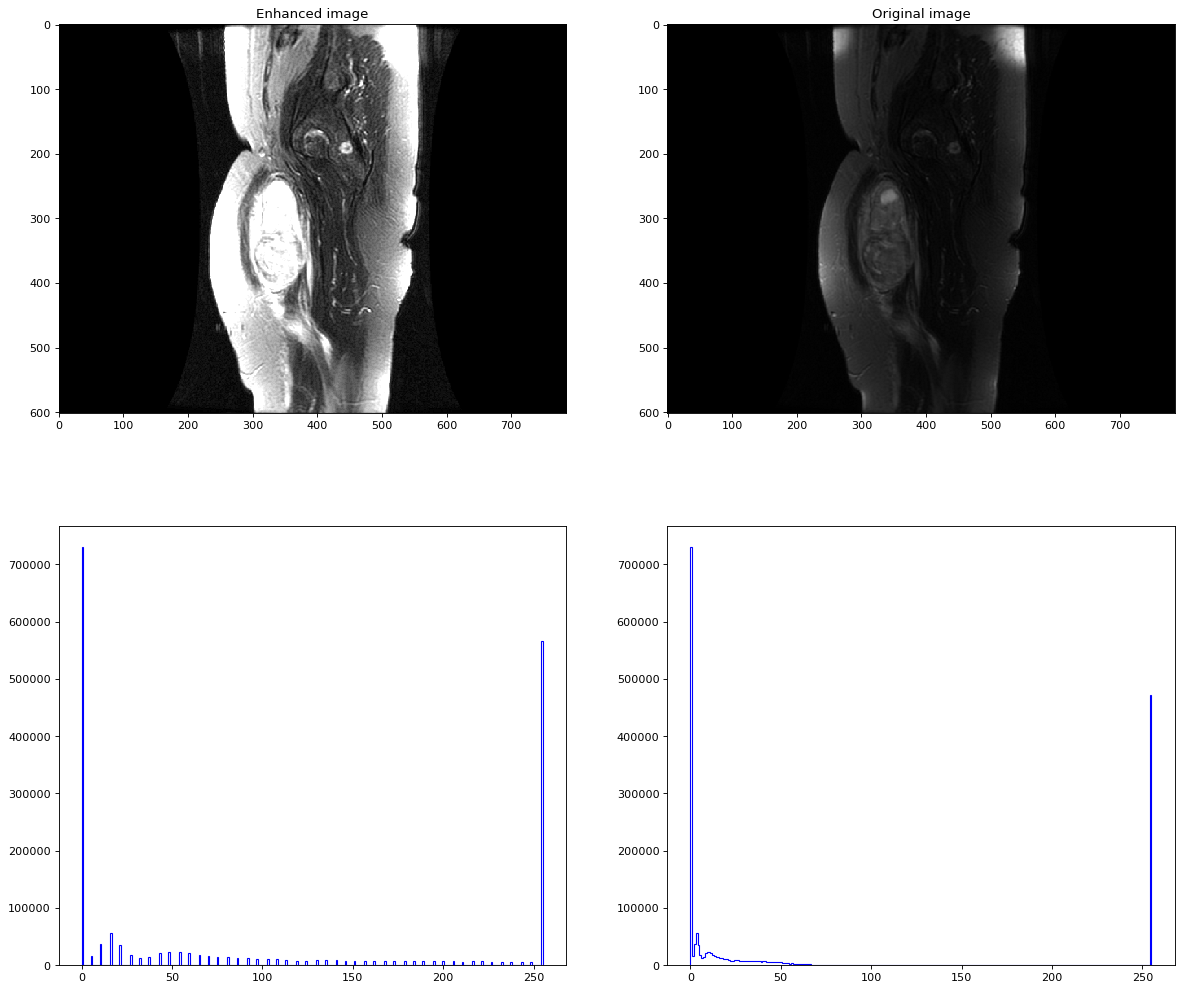

In [142]:

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
p2, p98 = np.percentile(mrithigharray, (5, 70))
img_eq2 = exposure.rescale_intensity(mrithigharray, in_range=(p2, p98))

plt.subplot(221)
plt.imshow(img_eq2)
plt.title('Enhanced image')
plt.subplot(222)
plt.imshow(mrithigharray)
plt.title('Original image')
plt.subplot(223)
ht=plt.hist(img_eq2.ravel(), bins=256, histtype='step', color='blue')
plt.subplot(224)
ht=plt.hist(mrithigharray.ravel(), bins=256, histtype='step', color='blue')

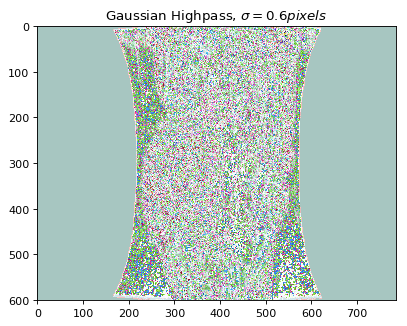

In [144]:
#Applying a gaussian high pass filter
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from PIL import Image


fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
def plot(data, title):
    plot.i += 1
    plt.subplot(2,2,plot.i)
    plt.imshow(data)
    plt.gray()
    plt.title(title)
plot.i = 0

im = Image.open('im023.png')
data = np.array(im, dtype=float)
lowpass = ndimage.gaussian_filter(data,0.6)
gauss_highpass = data - lowpass
plot(gauss_highpass, 'Gaussian Highpass, $\sigma = 0.6 pixels$' )
plt.show()

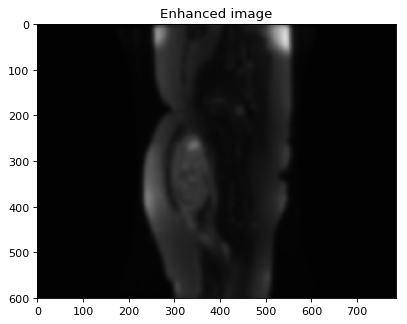

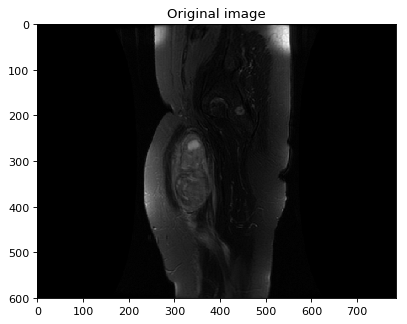

In [133]:
#Applying a gaussian smoothner
fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt

img = ndimage.gaussian_filter(img, sigma=(5, 5, 0), order=0)
plt.subplot(221)
plt.imshow(img, interpolation='nearest')
plt.title('Enhanced image')
plt.show()

fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
img = ndimage.imread('im023.png')
plt.subplot(222)
plt.imshow(img, interpolation='nearest')
plt.title('Original image')

plt.show()



(601L, 785L, 4L)


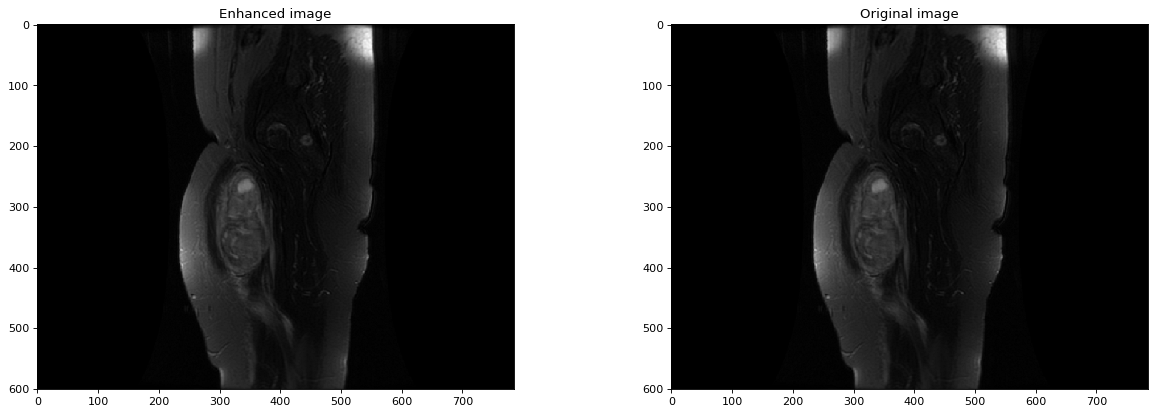

In [135]:
#Applying gray scale

fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.color import rgb2gray 
img = io.imread('im023.png')

print img.shape

import skimage.io as io
from skimage.color import rgb2gray 
img = io.imread('im023.png')
img_grayscale = rgb2gray(img)

io.imsave('im023-gs.png',img_grayscale)

plt.subplot(221)
plt.imshow(img_grayscale)
plt.title('Enhanced image')
plt.subplot(222)
plt.imshow(img)
plt.title('Original image')

show_grayscale = io.imshow(img_grayscale)
io.show()



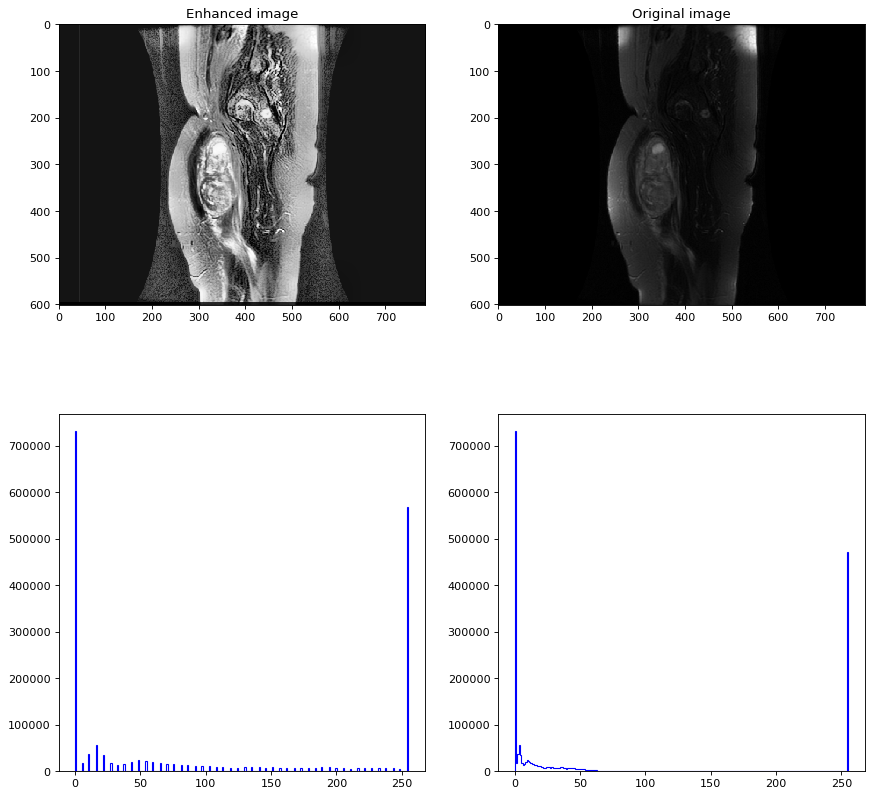

In [141]:
#Appliying adaptive histogram, the most efficient image enhancement technique for this imaging modality

img_adapteq = exposure.equalize_adapthist(mrithigharray, clip_limit=0.08)
fig=plt.figure(figsize=(13, 13), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(221)
plt.imshow(img_adapteq)
plt.title('Enhanced image')
plt.subplot(222)
plt.imshow(mrithigharray)
plt.title('Original image')
plt.subplot(223)
ht=plt.hist(img_eq2.ravel(), bins=256, histtype='step', color='blue')
plt.subplot(224)
ht=plt.hist(mrithigharray.ravel(), bins=256, histtype='step', color='blue')

## Summary

In this example we analyze the impact of reducing the encoding bits in an image on the rendering to the user.

Your work for this example is:

* Modify the clip limit in the Adaptive histogram equalization and observe the changes
* Investigate the function equalize_adapthist and analyse the effect of the modification of clip limit according to the function description

Comments and corrections welcome!

References
---------------

* Tinku Acharya and Ajoy K. Ray, *Image Processing - Principles and Applications*. Wiley InterScience, 2006.